# Bar plots for model comparison (33 subjects), without no-bias

In [16]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os



Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Define the values of  WAIC for the models


In [17]:
D_Inv_Full1 = np.load(str('results/waic/glam_PF2019_full_individual_Less_Inv_NoBin_Gamma-11_NUTS_33.npy'))
D_Full1 = np.load(str('results/waic/glam_PF2019_full_individual_Less_NoBin_Gamma-11_NUTS_33.npy'))
#D_NoBias1 = np.load(str('results/waic/glam_PF2019_nobias_individual_Dislike_NoBin_Gamma-11_NUTS_31.npy'))
#D_Inv_NoBias1 = np.load(str('results/waic/glam_PF2019_nobias_individual_Dislike_Inv_NoBin_Gamma-11_NUTS_31.npy'))

L_Full1 = np.load(str('results/waic/glam_PF2019_full_individual_More_NoBin_Gamma-11_NUTS_33.npy'))
#L_NoBias1 = np.load(str('results/waic/glam_PF2019_nobias_individual_Like_NoBin_Gamma-11_NUTS_31.npy'))

In [18]:
# extract waic values
D_Inv_Full = []
D_Full = []
#D_NoBias = []
#D_Inv_NoBias = []

L_Full = []
#L_NoBias = []
for i in range(len(D_Inv_Full1)):
    D_Inv_Full.append(D_Inv_Full1[i][0]) 
    D_Full.append(D_Full1[i][0])
 #   D_NoBias.append(D_NoBias1[i][0])
 #   D_Inv_NoBias.append(D_Inv_NoBias1[i][0]) 
    
    L_Full.append(L_Full1[i][0]) 
 #   L_NoBias.append(L_NoBias1[i][0]) 

In [19]:
# Load WAIC-score
Models_WAIC = [np.mean(L_Full),np.mean(D_Inv_Full),np.mean(D_Full)]
Models_WAIC_part = [L_Full,D_Inv_Full,D_Full]

x = np.arange(len(Models_WAIC))

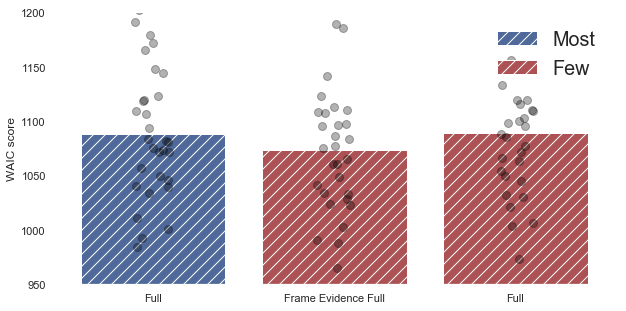

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')
plt.bar(x, Models_WAIC, color=['#4F6A9A',  '#AC5255', '#AC5255'],hatch='//')
plt.xticks(x, ('Full', 'Frame Evidence Full', 'Full'))
plt.ylim(950, 1200)
plt.ylabel('WAIC score')

like_patch = mpatches.Patch(facecolor='#4F6A9A',hatch='//', label='Most')
dislike_patch = mpatches.Patch(facecolor='#AC5255',hatch='//', label='Few')
leg = plt.legend(handles=[like_patch,dislike_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

for i in range(len(Models_WAIC)):
    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
sns.despine()

plt.show()

#fig.savefig(str('SavedFigures/GLAM_individual_WAIC_ModelComparison_31.png'), dpi = 200 )

### No participants dots

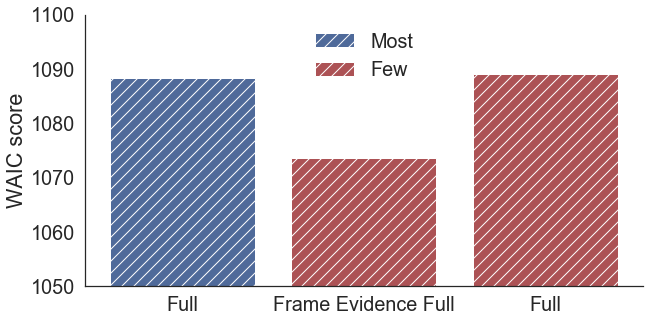

In [21]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')
plt.bar(x, Models_WAIC, color=['#4F6A9A',  '#AC5255', '#AC5255'],hatch='//')
plt.xticks(x, ('Full', 'Frame Evidence Full', 'Full'))
plt.ylim(1050, 1100)
plt.ylabel('WAIC score')

like_patch = mpatches.Patch(facecolor='#4F6A9A',hatch='//', label='Most')
dislike_patch = mpatches.Patch(facecolor='#AC5255',hatch='//', label='Few')
leg = plt.legend(handles=[like_patch,dislike_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)


sns.despine()

plt.show()

#fig.savefig(str('SavedFigures/GLAM_individual_WAIC_ModelComparison_31.png'), dpi = 200 )

In [7]:
Models_WAIC

[1088.2905863814835, 1073.6438620882013, 1088.9710919672393]

In [10]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("data1 = "+ str(mean(data1))+ "; data2 = "+ str(mean(data2))+"; [data1 - data2] =  " + str(diff) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(p) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1,hatch='//')
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    count = 0
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)
        #if data1[i] < data2[i]:
        print ("Participants with InvFull > Full: " + str(i+1) + '. Difference : ' + str(data1[i] - data2[i]))
            #count+=1
    print ("Total number of participants with lower WAIC for " + lab1+ ' : ' + str(count))
        
    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=18)
    plt.ylabel(title, fontsize=18)
    sns.despine()

data1 = 1073.6438620882013; data2 = 1088.9710919672393; [data1 - data2] =  -15.327229879037986; t =  -7.03 ; p-value =6.762957117320033e-08
Participants with InvFull > Full: 1. Difference : -27.895489076248396
Participants with InvFull > Full: 2. Difference : -21.190744940841114
Participants with InvFull > Full: 3. Difference : -1.2629936128073496
Participants with InvFull > Full: 4. Difference : -1.9568827145324121
Participants with InvFull > Full: 5. Difference : -5.7215041658053
Participants with InvFull > Full: 6. Difference : -15.619852752471274
Participants with InvFull > Full: 7. Difference : -7.623727870948869
Participants with InvFull > Full: 8. Difference : -8.322395940386059
Participants with InvFull > Full: 9. Difference : -8.779103464310197
Participants with InvFull > Full: 10. Difference : -21.771912675358863
Participants with InvFull > Full: 11. Difference : -32.951786215727225
Participants with InvFull > Full: 12. Difference : -15.421240914984878
Participants with InvFu

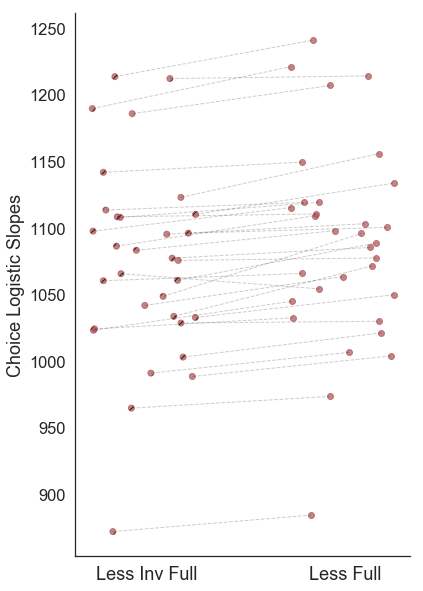

In [11]:
ttestsPlot(Models_WAIC_part[1], Models_WAIC_part[2],'#AC5255','#AC5255',"Less Inv Full",  "Less Full",title = 'Choice Logistic Slopes')
#plt.savefig('SavedFigures/SlopesConfidenceComparison.svg', format='svg', dpi = 500 )

## Plot individual participants score

### Calculate individual difference Waic_InvVal_less - Waic_less

In [12]:
# Load WAIC-score
from numpy import matrix

a = matrix(Models_WAIC_part[1])
b = matrix(Models_WAIC_part[2] )
Models_Waic_dislike_delta =np.array( a - b)[0]

x = np.arange(len(Models_Waic_dislike_delta))

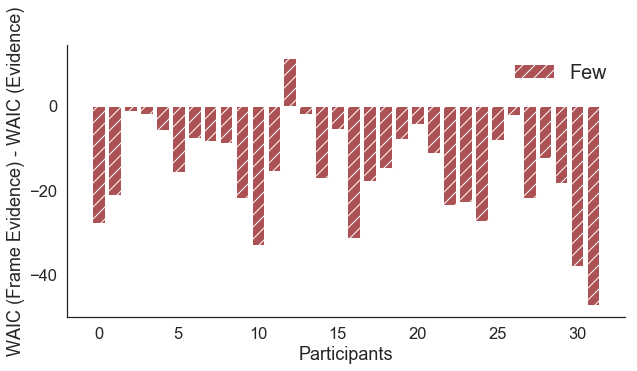

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')
plt.bar(x, Models_Waic_dislike_delta, color=['#AC5255'],hatch='//')
#plt.xticks(x, (' Frame Value - Reward Value'))
#plt.ylim(950, 1200)
plt.ylabel('WAIC (Frame Evidence) - WAIC (Evidence)')
plt.xlabel('Participants')

dislike_patch = mpatches.Patch(facecolor='#AC5255',hatch='//', label='Few')
leg = plt.legend(handles=[dislike_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
sns.despine()
plt.show()

#fig.savefig(str('SavedFigures/GLAM_individual_WAIC_ModelComparison_31.png'), dpi = 200 )

### Same plot but now with participants sorted by their WAIC score difference

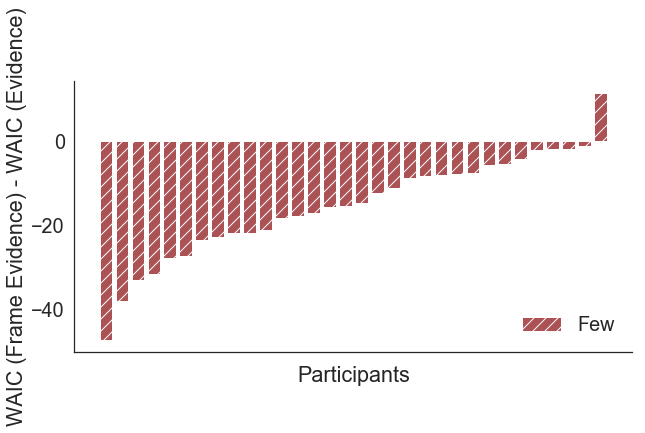

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style='white', font_scale=1.8)
ax.set_facecolor('xkcd:white')
plt.bar(x, np.sort(Models_Waic_dislike_delta), color=['#AC5255'],hatch='//')
plt.xticks(x, ( ))
#plt.ylim(950, 1200)
plt.ylabel('WAIC (Frame Evidence) - WAIC (Evidence)')
plt.xlabel('Participants')

dislike_patch = mpatches.Patch(facecolor='#AC5255',hatch='//', label='Few')
leg = plt.legend(handles=[dislike_patch], loc = "lower right")
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
sns.despine()
plt.show()

#fig.savefig(str('SavedFigures/GLAM_individual_WAIC_ModelComparison_31.png'), dpi = 200 )

## FOR models MORE show the WAIC fits

In [26]:
x = np.arange(len(Models_WAIC_part[0]))

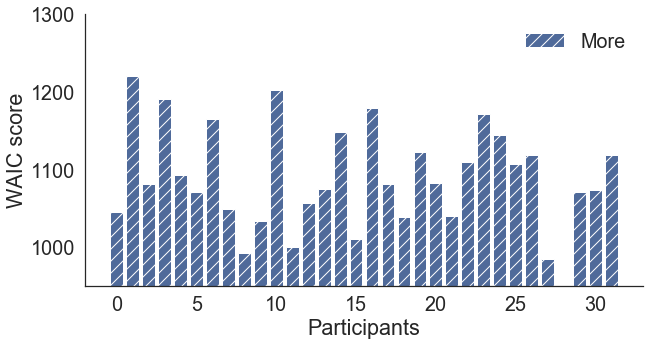

In [30]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')
plt.bar(x, Models_WAIC_part[0], color=['#4F6A9A'],hatch='//')
#plt.xticks(x, (' Frame Value - Reward Value'))
plt.ylim(950, 1300)
plt.ylabel('WAIC score')
plt.xlabel('Participants')

dislike_patch = mpatches.Patch(facecolor='#4F6A9A',hatch='//', label='More')
leg = plt.legend(handles=[dislike_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
sns.despine()
plt.show()

#fig.savefig(str('SavedFigures/GLAM_individual_WAIC_ModelComparison_31.png'), dpi = 200 )

## ---[END]---